#### Name: 

# Deep learning from scratch
## Homework 1
### Exercise 3

-----

### General instructions

Complete the exercise listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells. 

### When submitting this homework:

Make sure you have put your name at the top of each file
    
Make sure all output is present in your notebook prior to submission

----

## <span style="color:#a50e3e;">Exercise 3. </span>  Use gradient descent to minimize a simple function, and tune your steplength by analyzing the cost function plot (10 points)

In [8]:
# import necessary library
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

Copy the gradient descent code given in [Section 6.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/6_First_order_methods/6_4_Gradient_descent.html) into the cell below.

In [9]:
#### GRADIENT DESCENT CODE GOES HERE ####
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

Next, run gradient descent to minimize the following function

\begin{equation}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right)
\end{equation}

with an initial point $w_0 = 2$ and $50$ iterations.  Run gradient descent 3 times with 3 different choices: $\alpha = 1$, $\alpha = 10^{-1}$, $\alpha = 10^{-2}$.

Plot the resulting `cost_history` of each run in a single plot to compare their performance.

In [10]:
# create the input function
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   

<function matplotlib.pyplot.show>

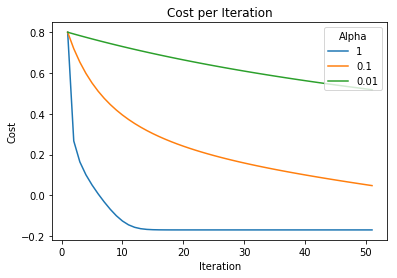

In [35]:
# YOUR CODE GOES HERE
alpha = [1, .1, .01]
iteration = 50
w0 = 2.0

for a in alpha:
    weights = []
    costs = []
    weights, costs = gradient_descent(g, a, iteration, w0)
    plt.plot(np.linspace(1,iteration+1,iteration+1), costs, label = a)

plt.title("Cost per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(title = "Alpha", loc = "upper right")
plt.show

### <strong>Question 1:</strong> Which steplength value works best for this particular function and initial point?

### Answer:

A step length of 1 seems to be the best for this initialization. It is the only curve that settles at a particular evaluation of g() for the given number of iterations.

### <strong>Question 2:</strong> What are the minimum and minimizer of $g(w)$ according to your best run of gradient descent?

In [50]:
# Your answer goes here.
weights, costs = gradient_descent(g, 1, 50, 2.0)
minimum = min(costs)
index = costs.index(minimum)
minimizer = weights[index]

print("Minimum: ", minimum)
print("Minimizer:", minimizer)

Minimum:  -0.16996928446309353
Minimizer: -1.2347728173291652
